In [3]:
import csv
import requests
import pandas as pd
from io import StringIO
import zipfile
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [8]:
url = 'https://raw.githubusercontent.com/quankiquanki/skytrax-reviews-dataset/master/data/airline.csv'
response = requests.get(url)
df_airlines = pd.read_csv(StringIO(response.text))

In [43]:
df_airlines.to_csv('airline_reviews.csv')

In [9]:
url1 = 'https://raw.githubusercontent.com/quankiquanki/skytrax-reviews-dataset/master/data/airport.csv'
response1 = requests.get(url1)
df_airports = pd.read_csv(StringIO(response1.text))

In [44]:
df_airports.to_csv('airport_reviews.csv')

In [6]:
flight_df = pd.read_csv('915401251_T_ONTIME.csv')

In [7]:
flight_df.columns

Index(['FL_DATE', 'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'DEP_TIME', 'DEP_DELAY',
       'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'CANCELLED',
       'CANCELLATION_CODE', 'DIVERTED', 'ACTUAL_ELAPSED_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'Unnamed: 34'],
      dtype='object')

In [6]:
df_airlines.columns

Index(['airline_name', 'link', 'title', 'author', 'author_country', 'date',
       'content', 'aircraft', 'type_traveller', 'cabin_flown', 'route',
       'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating',
       'ground_service_rating', 'wifi_connectivity_rating',
       'value_money_rating', 'recommended'],
      dtype='object')

In [7]:
df_airports.columns

Index(['airport_name', 'link', 'title', 'author', 'author_country', 'date',
       'content', 'experience_airport', 'date_visit', 'type_traveller',
       'overall_rating', 'queuing_rating', 'terminal_cleanliness_rating',
       'terminal_seating_rating', 'terminal_signs_rating',
       'food_beverages_rating', 'airport_shopping_rating',
       'wifi_connectivity_rating', 'airport_staff_rating', 'recommended'],
      dtype='object')

In [42]:
flight_df['WEATHER_DELAY'].value_counts()

0.0       67071
7.0         104
6.0         101
8.0          98
9.0          94
1.0          93
11.0         90
2.0          89
16.0         87
12.0         86
4.0          86
20.0         83
17.0         83
3.0          82
13.0         81
15.0         81
14.0         76
19.0         75
10.0         75
5.0          72
18.0         65
26.0         60
22.0         59
23.0         56
21.0         55
25.0         54
24.0         52
28.0         45
30.0         45
27.0         44
          ...  
183.0         1
182.0         1
179.0         1
169.0         1
1043.0        1
236.0         1
242.0         1
353.0         1
291.0         1
338.0         1
333.0         1
326.0         1
325.0         1
318.0         1
311.0         1
307.0         1
304.0         1
299.0         1
278.0         1
246.0         1
273.0         1
272.0         1
271.0         1
268.0         1
260.0         1
259.0         1
256.0         1
251.0         1
248.0         1
156.0         1
Name: WEATHER_DELAY, dty

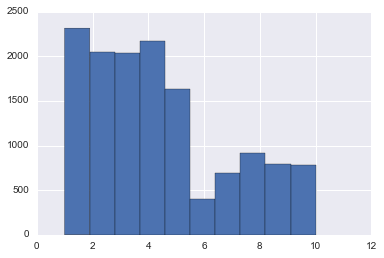

In [9]:
df_airports['overall_rating'].dropna().hist()

In [10]:
#df_airlines['author_country'].dropna().hist()

In [11]:
dict(Counter(df_airlines['author_country']))

{nan: 1591,
 'Lebanon': 15,
 'Mali': 1,
 'Nepal': 17,
 'Zambia': 7,
 'Taiwan': 55,
 'Belgium': 352,
 'Slovakia': 40,
 'Netherlands': 547,
 'Fiji': 7,
 'El Salvador': 4,
 'Azerbaijan': 3,
 'Botswana': 4,
 'Gibraltar': 2,
 'Bolivia': 2,
 'Maldives': 4,
 'Honduras': 5,
 'Portugal': 121,
 'Gambia': 1,
 'Papua New Guinea': 1,
 'Monaco': 4,
 'Tanzania': 9,
 'Seychelles': 2,
 'Palestinian Territories': 12,
 'Vietnam': 87,
 'Montenegro': 1,
 'Romania': 56,
 'Albania': 3,
 'Mauritania': 1,
 'Aruba': 5,
 'Andorra': 2,
 'Bangladesh': 25,
 'Iceland': 15,
 'Bhutan': 11,
 'Congo': 1,
 'Austria': 235,
 'Ethiopia': 6,
 'Thailand': 426,
 'Macedonia': 3,
 'Grenada': 1,
 'Iraq': 1,
 'South Korea': 88,
 'Oman': 24,
 'Uruguay': 3,
 'Moldova': 10,
 'Jamaica': 2,
 'Guatemala': 5,
 'Morocco': 9,
 'Philippines': 179,
 'Ecuador': 12,
 'Democratic Republic of the Congo': 1,
 'Bahrain': 23,
 'United States': 8507,
 'Kenya': 63,
 'Poland': 163,
 'Uganda': 10,
 'Sri Lanka': 32,
 'Hong Kong': 368,
 'Panama': 8,
 'Ar

In [14]:
flight_df.groupby(['UNIQUE_CARRIER'])['CANCELLED'].sum()

UNIQUE_CARRIER
AA    2720.0
AS     139.0
B6     897.0
DL     974.0
EV    1427.0
F9      77.0
HA       4.0
NK     308.0
OO     984.0
UA    1336.0
VX     159.0
WN    2640.0
Name: CANCELLED, dtype: float64

In [111]:
flight_df.head()

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,ARR_DELAY_NEW,CANCELLED,CANCELLATION_CODE,DIVERTED,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,Unnamed: 34,FL_YR
0,2016-01-01,AA,19805,AA,43,11433,1143302,31295,DTW,"Detroit, MI",...,32.0,0.0,NaN,0.0,197.0,986.0,26.0,0.0,NaN,2016
1,2016-01-01,AA,19805,AA,44,14747,1474703,30559,SEA,"Seattle, WA",...,8.0,0.0,NaN,0.0,329.0,2422.0,NaN,NaN,NaN,2016
2,2016-01-01,AA,19805,AA,45,12478,1247803,31703,JFK,"New York, NY",...,0.0,0.0,NaN,0.0,366.0,2422.0,NaN,NaN,NaN,2016
3,2016-01-01,AA,19805,AA,46,14831,1483103,32457,SJC,"San Jose, CA",...,0.0,0.0,NaN,0.0,246.0,1829.0,NaN,NaN,NaN,2016
4,2016-01-01,AA,19805,AA,47,13930,1393004,30977,ORD,"Chicago, IL",...,0.0,0.0,NaN,0.0,261.0,1829.0,NaN,NaN,NaN,2016


In [105]:
flight_df['FL_YR'] = flight_df['FL_DATE'].apply(lambda x: x[:4])

In [38]:
flight_df['CANCELLED'].value_counts()

0.0    434162
1.0     11665
Name: CANCELLED, dtype: int64

In [20]:
flight_df['origin_dest'] = list(zip(flight_df.UNIQUE_CARRIER, flight_df.ORIGIN_CITY_NAME, flight_df.DEST_CITY_NAME))

In [21]:
flight_df['origin_dest']

0                (AA, Detroit, MI, Dallas/Fort Worth, TX)
1                         (AA, Seattle, WA, New York, NY)
2                         (AA, New York, NY, Seattle, WA)
3                         (AA, San Jose, CA, Chicago, IL)
4                         (AA, Chicago, IL, San Jose, CA)
5                (AA, Phoenix, AZ, Dallas/Fort Worth, TX)
6                   (AA, Los Angeles, CA, Washington, DC)
7                            (AA, Chicago, IL, Tampa, FL)
8                          (AA, Orlando, FL, Chicago, IL)
9                             (AA, Denver, CO, Miami, FL)
10                            (AA, Miami, FL, Denver, CO)
11                        (AA, Kona, HI, Los Angeles, CA)
12                        (AA, Los Angeles, CA, Kona, HI)
13                 (AA, Dallas/Fort Worth, TX, Miami, FL)
14                 (AA, Miami, FL, Dallas/Fort Worth, TX)
15                           (AA, Houston, TX, Miami, FL)
16                           (AA, Miami, FL, Houston, TX)
17            

In [36]:
#flight_df['CARRIER_DELAY'].value_counts()

In [35]:
#df_airlines['airline_name'].value_counts()

In [27]:
flight_df.head()

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,ARR_DELAY_NEW,CANCELLED,CANCELLATION_CODE,DIVERTED,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,Unnamed: 34,origin_dest
0,2016-01-01,AA,19805,AA,43,11433,1143302,31295,DTW,"Detroit, MI",...,32.0,0.0,NaN,0.0,197.0,986.0,26.0,0.0,NaN,"(AA, Detroit, MI, Dallas/Fort Worth, TX)"
1,2016-01-01,AA,19805,AA,44,14747,1474703,30559,SEA,"Seattle, WA",...,8.0,0.0,NaN,0.0,329.0,2422.0,NaN,NaN,NaN,"(AA, Seattle, WA, New York, NY)"
2,2016-01-01,AA,19805,AA,45,12478,1247803,31703,JFK,"New York, NY",...,0.0,0.0,NaN,0.0,366.0,2422.0,NaN,NaN,NaN,"(AA, New York, NY, Seattle, WA)"
3,2016-01-01,AA,19805,AA,46,14831,1483103,32457,SJC,"San Jose, CA",...,0.0,0.0,NaN,0.0,246.0,1829.0,NaN,NaN,NaN,"(AA, San Jose, CA, Chicago, IL)"
4,2016-01-01,AA,19805,AA,47,13930,1393004,30977,ORD,"Chicago, IL",...,0.0,0.0,NaN,0.0,261.0,1829.0,NaN,NaN,NaN,"(AA, Chicago, IL, San Jose, CA)"


In [28]:
flight_df.columns

Index(['FL_DATE', 'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'DEP_TIME', 'DEP_DELAY',
       'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'CANCELLED',
       'CANCELLATION_CODE', 'DIVERTED', 'ACTUAL_ELAPSED_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'Unnamed: 34', 'origin_dest'],
      dtype='object')

In [34]:
#flight_df['FL_DATE'].value_counts()

In [31]:
df_airlines.iloc[0, 6]

"Outbound flight FRA/PRN A319. 2 hours 10 min flight. I thought drinks/snacks for sale but sandwich soft drinks were served complimentary. Inbound flights SKP/LJU/FRA CRJ900. each 1 hour 30 min flight. Skyshop menu was in a seat pocket and drinks/snacks were for sale. All flight crews were friendly. Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min."

In [32]:
len(df_airlines)

41396

In [33]:
len(df_airports)

17721

In [45]:
len(flight_df)

445827